In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys 
sys.path.append("/Users/julianganzabal/facultad/lab-ml/mllab-tools")

In [3]:
from RNN_utils import window_transform_text, sample
from fnn_helper import PlotLosses
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils import to_categorical

Using TensorFlow backend.


In [4]:
text_raw = open('poesia_completa.txt').read()

In [5]:
print(text_raw[:1000])


Veleta
Julio de 1920
FUENTE VAQUEROS
GRANADA
Viento del Sur.
Moreno, ardiente,
Llegas sobre mi carne,
Trayéndome semilla
De brillantes
Miradas, empapado
De azahares.
Pones roja la luna
Y sollozantes
Los álamos cautivos, pero vienes
¡Demasiado tarde!
¡Ya he enrollado la noche de mi
cuento
En el estante!
Sin ningún viento,
¡Hazme caso!
Gira, corazón;
Gira, corazón.
Aire del Norte,
¡Oso blanco del viento!,
Llegas sobre mi carne
Tembloroso de auroras
Boreales,
Con tu capa de espectros
Capitanes,
Y riyéndote a gritos
Del Dante.
¡Oh pulidor de estrellas!
Pero vienes
Demasiado tarde.
Mi almario está musgoso
Y he perdido la llave.
Sin ningún viento,
¡Hazme caso!
Gira, corazón;
Gira, corazón.
Brisas gnomos y vientos
De ninguna parte,
Mosquitos de la rosa
De pétalos pirámides,
Alisios destetados
Entre los rudos árboles,
Flautas en la tormenta,
¡Dejadme!
Tiene recias cadenas
Mi recuerdo,
Y está cautiva el ave
Que dibuja con trinos
La tarde.
Las cosas que se van no vuelven
nunca,
Todo el mundo lo

In [6]:
text = text_raw.replace('\n',' ~enter~ ').replace(',',' ~coma~ '). \
                replace('¿',' ~oq~ ').replace('?',' ~cq~ ').replace('¡',' ~oa~ '). \
                replace('!',' ~ca~ ').replace('.',' ~punto~ ')

In [7]:
print(text[:200])

 ~enter~ Veleta ~enter~ Julio de 1920 ~enter~ FUENTE VAQUEROS ~enter~ GRANADA ~enter~ Viento del Sur ~punto~  ~enter~ Moreno ~coma~  ardiente ~coma~  ~enter~ Llegas sobre mi carne ~coma~  ~enter~ Tray


In [8]:
words = text_to_word_sequence(text, filters='"#$%&()*+,-./:;<=>?@[\\]^_`{|}\t\n—',)

In [9]:
print(len(words))
words_list = list(set(words))
number_of_words = len(words_list)
print(number_of_words)

114892
12163


In [10]:
from collections import Counter
Counter(words).most_common()

[('~enter~', 18546),
 ('~punto~', 5423),
 ('de', 5262),
 ('~coma~', 4950),
 ('la', 3411),
 ('y', 2974),
 ('el', 2676),
 ('en', 1925),
 ('que', 1925),
 ('los', 1676),
 ('las', 1369),
 ('a', 1059),
 ('del', 991),
 ('un', 977),
 ('se', 864),
 ('por', 855),
 ('con', 844),
 ('~oa~', 834),
 ('~ca~', 832),
 ('no', 681),
 ('una', 631),
 ('mi', 501),
 ('su', 498),
 ('es', 490),
 ('al', 378),
 ('como', 369),
 ('lo', 357),
 ('sin', 347),
 ('para', 346),
 ('tu', 343),
 ('~cq~', 341),
 ('~oq~', 336),
 ('me', 336),
 ('yo', 313),
 ('sus', 301),
 ('sobre', 292),
 ('pero', 283),
 ('luna', 256),
 ('amor', 254),
 ('qué', 240),
 ('agua', 228),
 ('ni', 213),
 ('más', 213),
 ('corazón', 207),
 ('donde', 207),
 ('noche', 204),
 ('te', 204),
 ('ya', 187),
 ('cielo', 176),
 ('o', 171),
 ('ojos', 164),
 ('dos', 161),
 ('ay', 159),
 ('hay', 157),
 ('luz', 151),
 ('sangre', 145),
 ('tiene', 144),
 ('oh', 141),
 ('ha', 138),
 ('aire', 137),
 ('muerte', 135),
 ('si', 133),
 ('era', 131),
 ('está', 129),
 ('mis', 12

In [11]:
word_to_index = dict([(word, i) for i,word in enumerate(words_list)])
index_to_word = dict([(i, word) for i,word in enumerate(words_list)])

In [12]:
word_to_index

{'soriano': 0,
 'fragmento': 1,
 'tronchaba': 2,
 'síguela': 3,
 'rotundidad': 4,
 'pareció': 5,
 'gradual': 6,
 'esparce': 7,
 'castro': 8,
 'rojo': 9,
 'estremecido': 10,
 '«gacelas»': 11,
 'cristiano': 12,
 'luchaba': 13,
 'estatuto': 14,
 'harás': 15,
 'aristocrático': 16,
 'piras': 17,
 'débil': 18,
 'garganta': 19,
 'adquiere': 20,
 'minutos': 21,
 'directa': 22,
 'burbujas': 23,
 'espejismo': 24,
 'desierta': 25,
 'sorprendió': 26,
 'literaria': 27,
 'pacifican': 28,
 'creaciones': 29,
 'reflejada': 30,
 'acecha': 31,
 'maletín': 32,
 'eternidad': 33,
 'teatros': 34,
 'cadaqués': 35,
 'volver': 36,
 'fortuna': 37,
 'princesas': 38,
 'ramos': 39,
 'coleccionistas': 40,
 'pálida': 41,
 'litografía': 42,
 'desaparecen': 43,
 'frondas': 44,
 'boyas': 45,
 'tonto': 46,
 'quejo': 47,
 'incapaz': 48,
 'remendones': 49,
 'taberna': 50,
 'aprieta': 51,
 'además': 52,
 'descarnada': 53,
 'militares': 54,
 'ardillas': 55,
 'vivas': 56,
 'alemanes': 57,
 'existiendo': 58,
 'labios': 59,
 'a

In [13]:
words[:100]

['~enter~',
 'veleta',
 '~enter~',
 'julio',
 'de',
 '1920',
 '~enter~',
 'fuente',
 'vaqueros',
 '~enter~',
 'granada',
 '~enter~',
 'viento',
 'del',
 'sur',
 '~punto~',
 '~enter~',
 'moreno',
 '~coma~',
 'ardiente',
 '~coma~',
 '~enter~',
 'llegas',
 'sobre',
 'mi',
 'carne',
 '~coma~',
 '~enter~',
 'trayéndome',
 'semilla',
 '~enter~',
 'de',
 'brillantes',
 '~enter~',
 'miradas',
 '~coma~',
 'empapado',
 '~enter~',
 'de',
 'azahares',
 '~punto~',
 '~enter~',
 'pones',
 'roja',
 'la',
 'luna',
 '~enter~',
 'y',
 'sollozantes',
 '~enter~',
 'los',
 'álamos',
 'cautivos',
 '~coma~',
 'pero',
 'vienes',
 '~enter~',
 '~oa~',
 'demasiado',
 'tarde',
 '~ca~',
 '~enter~',
 '~oa~',
 'ya',
 'he',
 'enrollado',
 'la',
 'noche',
 'de',
 'mi',
 '~enter~',
 'cuento',
 '~enter~',
 'en',
 'el',
 'estante',
 '~ca~',
 '~enter~',
 'sin',
 'ningún',
 'viento',
 '~coma~',
 '~enter~',
 '~oa~',
 'hazme',
 'caso',
 '~ca~',
 '~enter~',
 'gira',
 '~coma~',
 'corazón',
 '~enter~',
 'gira',
 '~coma~',
 'cora

In [14]:
encoded_text = [word_to_index[word] for word in words]

In [15]:
encoded_text[:100]

[1283,
 5143,
 1283,
 1644,
 12100,
 3363,
 1283,
 8667,
 1822,
 1283,
 2849,
 1283,
 6580,
 10703,
 11502,
 11514,
 1283,
 3343,
 11074,
 10513,
 11074,
 1283,
 10621,
 3446,
 6835,
 12048,
 11074,
 1283,
 2370,
 5643,
 1283,
 12100,
 5787,
 1283,
 2338,
 11074,
 2006,
 1283,
 12100,
 7638,
 11514,
 1283,
 7710,
 7963,
 8149,
 5456,
 1283,
 10411,
 4097,
 1283,
 1633,
 9160,
 1362,
 11074,
 1846,
 7317,
 1283,
 1684,
 6195,
 5673,
 8023,
 1283,
 1684,
 5350,
 6461,
 10983,
 8149,
 10118,
 12100,
 6835,
 1283,
 4889,
 1283,
 4620,
 11379,
 3204,
 8023,
 1283,
 11519,
 2187,
 6580,
 11074,
 1283,
 1684,
 7106,
 626,
 8023,
 1283,
 3014,
 11074,
 8798,
 1283,
 3014,
 11074,
 8798,
 11514,
 1283,
 6728,
 10703,
 707]

In [16]:
window_size = 1
step_size = 1
inputs, outputs_raw = window_transform_text(encoded_text, window_size, step_size)

In [17]:
outputs = to_categorical(outputs_raw, num_classes=number_of_words)

In [18]:
outputs.shape

(114891, 12163)

In [19]:
inputs[0], outputs[0], inputs[1], outputs[1]

([1283],
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 [5143],
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]))

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np

In [21]:
np.array(inputs).shape

(114891, 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(np.array(inputs), outputs, test_size=0.5, random_state=42)

In [23]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(57445, 1) (57445, 12163)
(57446, 1) (57446, 12163)


In [37]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import ModelCheckpoint 

In [53]:
embedding_vecor_length = 10
dropout_p = 0.2
input_length = window_size
input_length = window_size
model = Sequential()
model.add(Embedding(number_of_words, embedding_vecor_length, input_length=1))
model.add(LSTM(50))
model.add(Dense(number_of_words, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 1, 10)             121630    
_________________________________________________________________
lstm_13 (LSTM)               (None, 50)                12200     
_________________________________________________________________
dense_12 (Dense)             (None, 12163)             620313    
Total params: 754,143
Trainable params: 754,143
Non-trainable params: 0
_________________________________________________________________
None


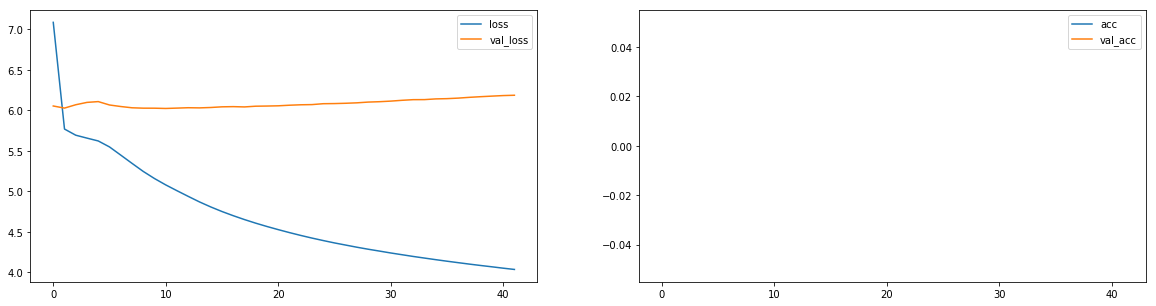

57445/57445 [==============================] - 30s - loss: 4.0364 - val_loss: 6.1878
Epoch 43/50
57400/57445 [============================>.] - ETA: 0s - loss: 4.0219

KeyboardInterrupt: 

In [54]:
checkpointer = ModelCheckpoint(filepath='poemas_first_model_dropout_32.hdf5', verbose=1, save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer='adam')
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
model.fit(X_train, y_train, epochs=50, batch_size=100, callbacks=[checkpointer, plot_losses], validation_data=(X_test, y_test))

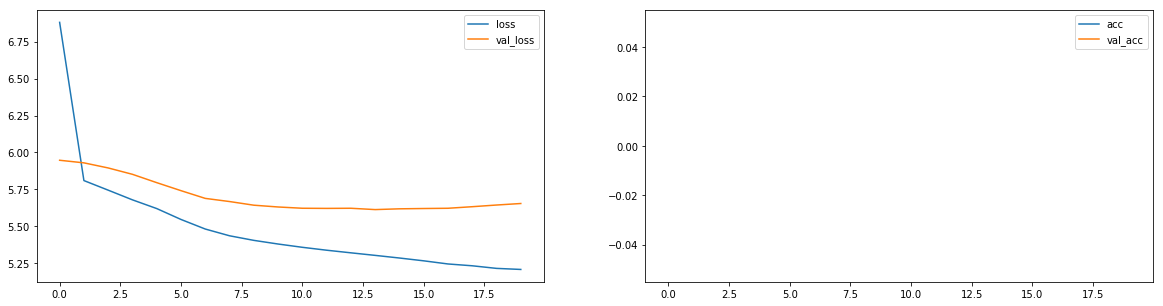

57445/57445 [==============================] - 30s - loss: 5.2073 - val_loss: 5.6540
Epoch 21/50
53900/57445 [===========================>..] - ETA: 1s - loss: 5.1940- ETA: 1s - l

KeyboardInterrupt: 

In [26]:
checkpointer = ModelCheckpoint(filepath='poemas_first_model.hdf5', verbose=1, save_best_only=True)
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
model.fit(X_train, y_train, epochs=50, batch_size=100, callbacks=[checkpointer, plot_losses], validation_data=(X_test, y_test))

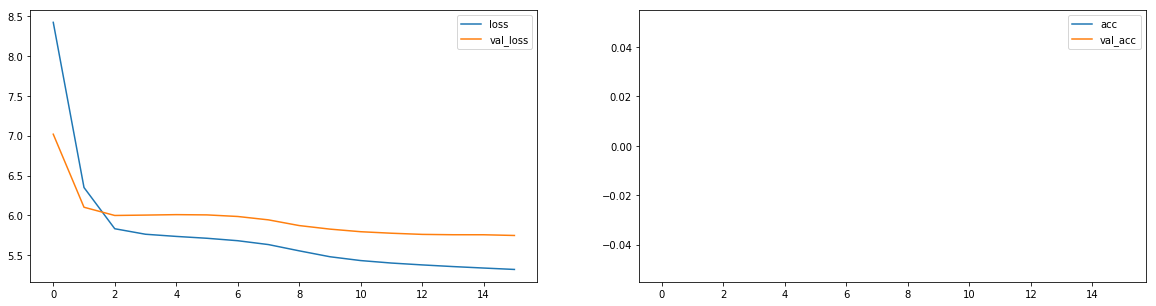

57445/57445 [==============================] - 30s - loss: 5.3237 - val_loss: 5.7496
Epoch 17/50
34750/57445 [=================>............] - ETA: 5s - loss: 5.2914

In [ ]:
checkpointer = ModelCheckpoint(filepath='poemas_first_model.hdf5', verbose=1, save_best_only=True)
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
model.fit(X_train, y_train, epochs=50, batch_size=100, callbacks=[checkpointer, plot_losses], validation_data=(X_test, y_test))

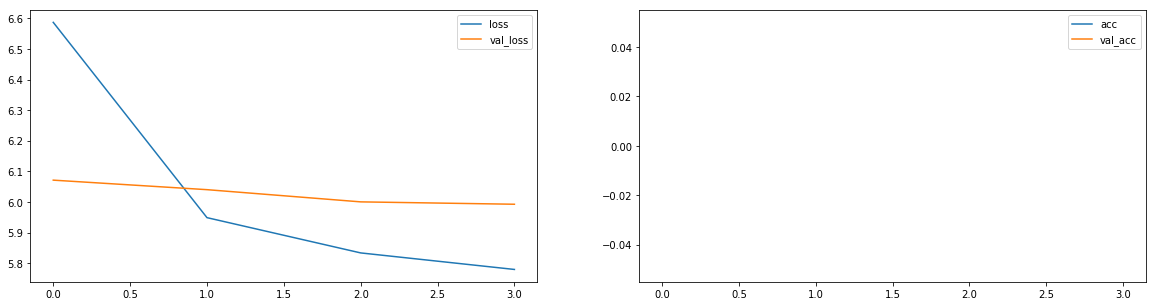

57444/57444 [==============================] - 177s - loss: 5.7792 - val_loss: 5.9924
Epoch 5/250
25250/57444 [============>.................] - ETA: 78s - loss: 5.7100

KeyboardInterrupt: 

In [306]:
# create the model
dropout_p = 0.4
embedding_vecor_length = 8
input_length = window_size
model = Sequential()
model.add(Embedding(number_of_words, embedding_vecor_length, input_length=input_length))
model.add(LSTM(100, dropout=dropout_p, recurrent_dropout=dropout_p))
model.add(Dense(number_of_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

checkpointer = ModelCheckpoint(filepath='poemas_second_model.hdf5', verbose=1, save_best_only=True)
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
model.fit(X_train, y_train, epochs=250, batch_size=250, callbacks=[checkpointer, plot_losses], validation_data=(X_test, y_test))

In [ ]:
# El de overfitting es este:
embedding_vecor_length = 8
input_length = window_size
model = Sequential()
model.add(Embedding(number_of_words, embedding_vecor_length, input_length=input_length))
model.add(LSTM(250))
model.add(Dense(number_of_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
print(model.summary())

In [239]:
def decode_sequence(seq):
    poem = ''
    for index in seq:
        decoded_word = ' ' + index_to_word[index] 
        poem = poem + decoded_word
        poem = poem.replace('~enter~', '\n').replace(' ~coma~',','). \
                replace('~oq~', '¿').replace('~cq~', '?').replace('~oa~', '¡'). \
                replace('~ca~','!').replace('~punto~','.')
        
    return poem
print(decode_sequence(X_test[1]))

 tristeza tan honda tendrás dentro del alma 
 al sentir en el pecho ya cansado y exhausto 
 la pasión


In [242]:
initial_seq = list(X_test[1])

N=100
for i in range(N):
    probs = model.predict(np.array([initial_seq[i:]]))
    idx = sample(probs[0], 1.5)
    initial_seq.append(idx)
print(decode_sequence(initial_seq))

 tristeza tan honda tendrás dentro del alma 
 al sentir en el pecho ya cansado y exhausto 
 la pasión de una niña recién enamorada ! 
 
 tu cuerpo irá a la tumba 
 intacto de emociones 
 sobre la oscura tierra 
 brotará una alborada 
 de tus ojos saldrán perdido 
 sangrientos 
 pedazos del tan muertos 
 
 mis mira nos horizonte de los tristeza 
 ¿ a demás y mucho, 
 con papel te árbol en la corazón 
 de perdidas sobre 
 ¡ llamen la ojos 
 
 y sol los saber 
 
 que llevas fernández corazón 
 y amargo de dulce 
 
 y sombra una no en la gran amor


In [ ]:
Tu cuerpo irá a la tumba
intacto de emociones.
Sobre la oscura tierra
brotará una alborada.
De tus ojos saldrán dos claveles sangrientos